# California Housing Price Prediction
## Introduction
This is a homework assignment for the __[Machine Learning For Absolute Beginners](https://mlearnfab.github.io/web/intro.html)__ class where linear regression is used to predict housing prices in California.
## Problem Statement
Build a model using linear regression that will accurately predict California housing prices
## Input
A dataset containing information on housing in California along with a target Price
## Output
Since this dataset has been cleaned up it has no missing values but it does contain outliers.
1. A dataset where the outliers have been mitigated

## Data Source
__[California Housing Dataset](https://raw.githubusercontent.com/mlearnfab/mlearnfab/main/workshop15minbuild/data/calhousing.csv)__

MIT License

Copyright (c) 2022 UFO Software, LLC

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read In the Dataset

In [2]:
url = 'https://raw.githubusercontent.com/mlearnfab/mlearnfab/main/workshop15minbuild/data/calhousing.csv'
df = pd.read_csv(url)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


## The dataset has no missing values and all the data is numeric

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


## Outliers
The following features appear to have outliers
1. AveRooms
2. AveBedrms
3. AveOccup

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## AveRooms
141.91 rooms seems excessive and while it might be referring to an area with high rise apartment complexes it could also be a typo or if it is not a typo it certainly is skewing the dataset and the results of the regression.

## The majority of AveRooms are less than 12
You can experiment with other cutoff values to see how it effects the accuracy of the regression

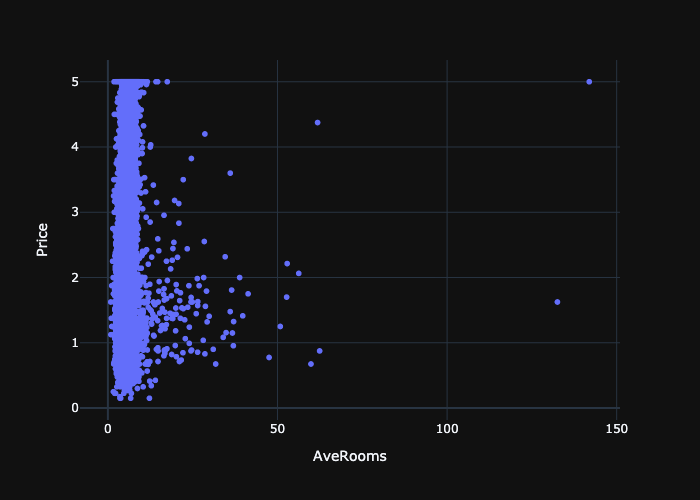

In [5]:
fig = px.scatter(df, x="AveRooms", y="Price", template="plotly_dark" )
#fig.show()
fig.show('png')

In [6]:
df.query('AveRooms > 12')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
1024,3.1500,16,29.852941,5.323529,202,1.980392,38.52,-120.00,1.406
1102,2.4028,17,31.777778,9.703704,47,1.740741,40.06,-121.54,0.675
1233,3.7500,10,16.847534,3.237668,546,2.448430,38.23,-120.34,1.214
1234,4.4063,13,28.757282,5.300971,252,2.446602,38.26,-120.33,1.558
1235,2.9821,17,13.473039,2.588235,997,2.443627,38.25,-120.34,1.115
...,...,...,...,...,...,...,...,...,...
19976,3.1250,10,21.095238,5.285714,48,2.285714,36.19,-118.37,0.713
19977,2.3937,20,18.793522,5.263158,658,2.663968,35.82,-118.70,0.821
20093,2.0625,37,24.669118,4.897059,338,2.485294,38.12,-120.12,0.889
20094,2.1250,26,37.063492,7.185185,416,2.201058,38.19,-120.03,1.325


In [7]:
df = df.query('AveRooms < 12')
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000
mean,3.870574,28.715540,5.297038,1.069902,1432.511979,3.074511,35.621918,-119.573349,2.071016
std,1.898052,12.575564,1.274305,0.143758,1132.726950,10.422249,2.130666,2.003646,1.154817
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.434997,1.005747,793.000000,2.432727,33.930000,-121.800000,1.198000
50%,3.534700,29.000000,5.219585,1.048128,1171.000000,2.823322,34.250000,-118.490000,1.801000
75%,4.744800,37.000000,6.027555,1.098000,1729.000000,3.285983,37.710000,-118.010000,2.652000
max,15.000100,52.000000,11.901869,3.411111,35682.000000,1243.333333,41.950000,-114.310000,5.000010


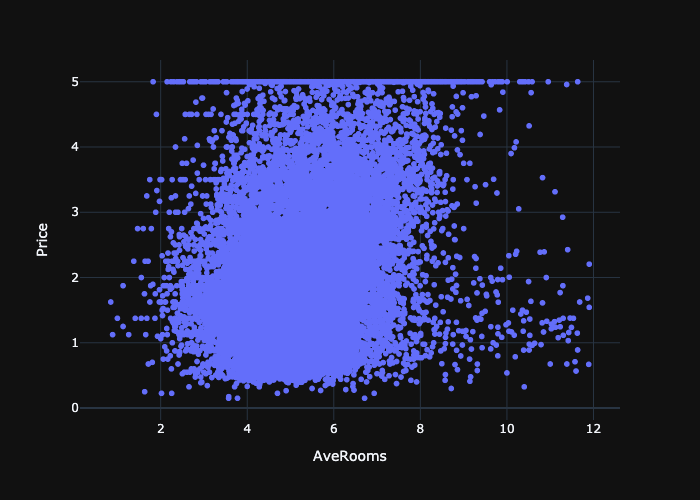

In [8]:
fig = px.scatter(df, x="AveRooms", y="Price", template="plotly_dark" )
#fig.show()
fig.show('png')

## Less Than 1 Room
This is likely a typo.  There are only two occurrences but they do skew the data and will have some influence on the regression.

In [9]:
df.query('AveRooms < 1')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
5916,2.8750,46,0.846154,0.846154,24,1.846154,34.28,-118.44,1.625
8219,4.5938,33,0.888889,0.500000,96,2.666667,33.79,-118.21,1.125


In [10]:
df = df.query('AveRooms >= 1')
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20493.000000,20493.000000,20493.000000,20493.000000,20493.000000,20493.000000,20493.000000,20493.000000,20493.000000
mean,3.870587,28.714488,5.297470,1.069940,1432.645928,3.074590,35.622073,-119.573471,2.071084
std,1.898126,12.575562,1.273615,0.143701,1132.701006,10.422754,2.130710,2.003705,1.154850
min,0.499900,1.000000,1.000000,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.435185,1.005747,793.000000,2.432727,33.930000,-121.800000,1.198000
50%,3.534700,29.000000,5.219595,1.048128,1171.000000,2.823333,34.250000,-118.490000,1.802000
75%,4.745000,37.000000,6.027714,1.098016,1729.000000,3.286004,37.710000,-118.010000,2.652000
max,15.000100,52.000000,11.901869,3.411111,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## AveBedrms
Even though the majority of values are below 2; 3.5 seems like a reasonable number of bedrooms.

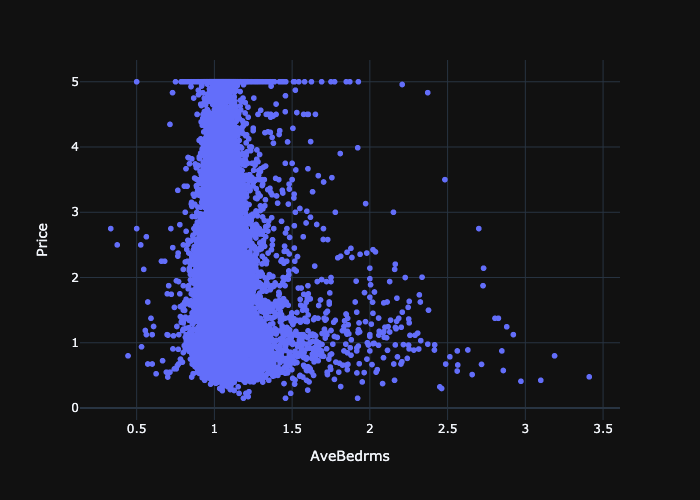

In [11]:
fig = px.scatter(df, x="AveBedrms", y="Price", template="plotly_dark" )
#fig.show()
fig.show('png')

## AveBedrms less than 1
It seems like it is a typo but there are a large number of entries with AveBedrms less than 1 so it is a probably a good idea to keep them.  You could try removing them and see how it effects the accuracy of the regression.

In [12]:
df.query('AveBedrms < 1')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
6,3.6591,52,4.931907,0.951362,1094,2.128405,37.84,-122.25,2.992
9,3.6912,52,4.970588,0.990196,1551,2.172269,37.84,-122.25,2.611
17,2.1202,52,4.052805,0.966997,648,2.138614,37.85,-122.27,1.555
37,1.4103,52,3.749380,0.967742,901,2.235732,37.83,-122.28,1.039
...,...,...,...,...,...,...,...,...,...
20613,1.4958,31,4.500000,0.950521,1167,3.039062,39.09,-121.55,0.534
20614,2.4695,26,4.801688,0.970464,1455,3.069620,39.08,-121.54,0.580
20617,3.3021,20,4.921053,0.956140,308,2.701754,39.06,-121.53,0.708
20620,4.5625,40,4.125000,0.854167,151,3.145833,39.05,-121.48,1.000


## AveOccup
The majority of values are less than 7.

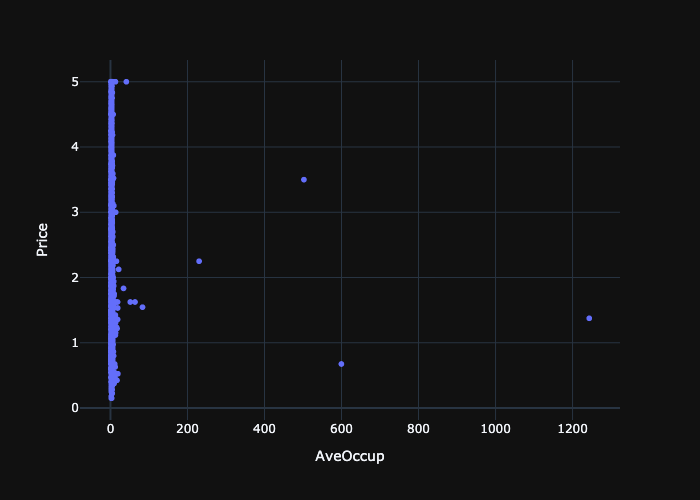

In [13]:
fig = px.scatter(df, x="AveOccup", y="Price", template="plotly_dark" )
#fig.show()
fig.show('png')

In [14]:
df.query('AveOccup > 10')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
91,0.8668,52,2.443182,0.988636,904,10.272727,37.80,-122.28,1.37500
270,3.8750,33,3.021277,0.659574,575,12.234043,37.78,-122.18,2.25000
1039,4.3029,16,6.090592,1.121951,4930,17.177700,38.42,-120.97,1.21900
1067,3.4191,52,4.530612,0.816327,1107,11.295918,39.73,-121.85,1.37500
1617,11.7064,17,9.361702,1.127660,1722,12.212766,37.84,-122.08,5.00001
2723,3.4107,13,5.156250,1.125000,822,12.843750,32.75,-115.50,1.42500
2899,1.9125,35,2.926829,0.853659,477,11.634146,35.37,-119.01,0.47500
3364,5.5179,36,5.142857,1.142857,4198,599.714286,40.41,-120.51,0.67500
4479,3.5769,41,4.940000,1.100000,925,18.500000,34.07,-118.16,1.35700
4861,0.4999,29,2.373272,1.055300,2690,12.396313,34.02,-118.28,5.00001


In [15]:
df = df.query('AveOccup < 10')
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000
mean,3.870501,28.712568,5.297701,1.069875,1430.437601,2.921908,35.621243,-119.572957,2.071522
std,1.895251,12.570563,1.271341,0.143239,1128.480012,0.765993,2.130575,2.003586,1.154523
min,0.499900,1.000000,1.000000,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.435428,1.005797,793.000000,2.432177,33.930000,-121.800000,1.198000
50%,3.534900,29.000000,5.219780,1.048110,1171.000000,2.821705,34.250000,-118.490000,1.804000
75%,4.746400,37.000000,6.027027,1.097902,1728.000000,3.282392,37.710000,-118.010000,2.653000
max,15.000100,52.000000,11.901869,3.411111,35682.000000,9.954545,41.950000,-114.310000,5.000010


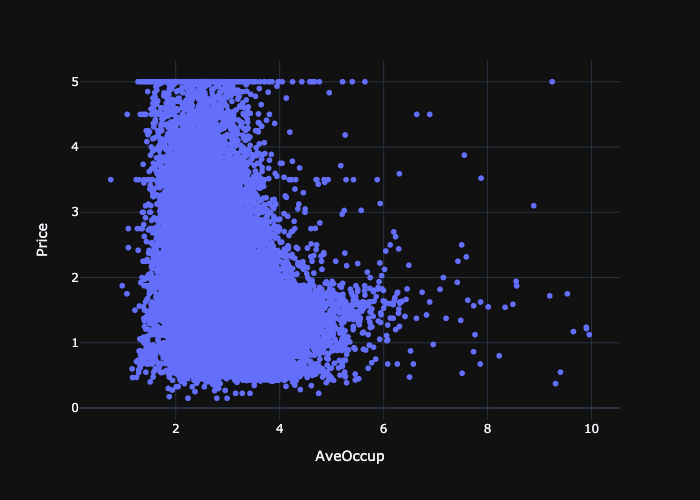

In [16]:
fig = px.scatter(df, x="AveOccup", y="Price", template="plotly_dark" )
#fig.show()
fig.show('png')

In [17]:
df = df.query('AveOccup < 7')
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20424.000000,20424.000000,20424.000000,20424.000000,20424.000000,20424.000000,20424.000000,20424.000000,20424.000000
mean,3.870682,28.714454,5.298464,1.069878,1428.268018,2.913240,35.621507,-119.573005,2.072053
std,1.894009,12.566172,1.271010,0.143097,1101.315836,0.734728,2.130886,2.003756,1.154720
min,0.499900,1.000000,1.000000,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.436681,1.005793,793.000000,2.431564,33.930000,-121.800000,1.198000
50%,3.535250,29.000000,5.219834,1.048101,1170.500000,2.819961,34.250000,-118.490000,1.804000
75%,4.747050,37.000000,6.028119,1.097902,1727.000000,3.279945,37.710000,-118.010000,2.654000
max,15.000100,52.000000,11.901869,3.411111,28566.000000,6.954023,41.950000,-114.310000,5.000010


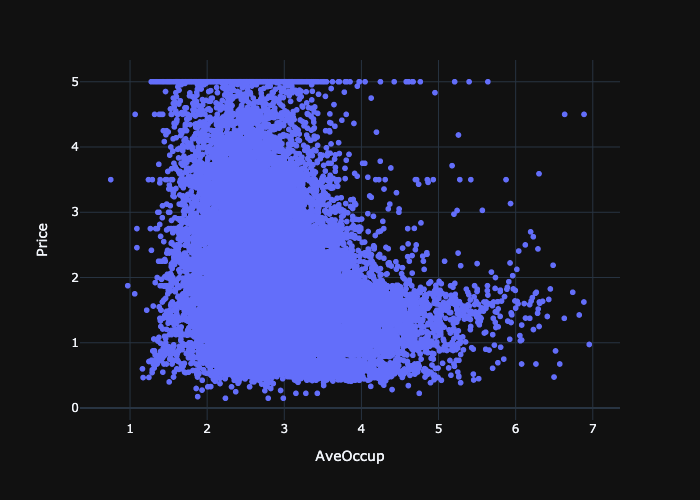

In [18]:
fig = px.scatter(df, x="AveOccup", y="Price", template="plotly_dark" )
#fig.show()
fig.show('png')

## AveOccup less than 1
There are only two entries so it makes sense to remove them to improve the accuracy of the regression.

In [19]:
df.query('AveOccup < 1').describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.609250,16.500000,3.436275,1.245098,100.500000,0.860294,35.845000,-119.720000,2.687500
std,0.103591,0.707107,1.504335,0.360486,137.885822,0.155979,2.552655,1.810193,1.149049
min,0.536000,16.000000,2.372549,0.990196,3.000000,0.750000,34.040000,-121.000000,1.875000
25%,0.572625,16.250000,2.904412,1.117647,51.750000,0.805147,34.942500,-120.360000,2.281250
50%,0.609250,16.500000,3.436275,1.245098,100.500000,0.860294,35.845000,-119.720000,2.687500
75%,0.645875,16.750000,3.968137,1.372549,149.250000,0.915441,36.747500,-119.080000,3.093750
max,0.682500,17.000000,4.500000,1.500000,198.000000,0.970588,37.650000,-118.440000,3.500000


In [20]:
df = df.query('AveOccup >= 1')
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000
mean,3.871001,28.715650,5.298647,1.069861,1428.398051,2.913441,35.621485,-119.572990,2.071992
std,1.893827,12.566204,1.270895,0.143072,1101.290947,0.734482,2.130914,2.003813,1.154733
min,0.499900,1.000000,1.000000,0.333333,5.000000,1.060606,32.540000,-124.350000,0.149990
25%,2.563925,18.000000,4.436697,1.005799,793.250000,2.431675,33.930000,-121.800000,1.198000
50%,3.535500,29.000000,5.220048,1.048101,1171.000000,2.820179,34.250000,-118.490000,1.804000
75%,4.747150,37.000000,6.028123,1.097895,1727.000000,3.279982,37.710000,-118.010000,2.654000
max,15.000100,52.000000,11.901869,3.411111,28566.000000,6.954023,41.950000,-114.310000,5.000010


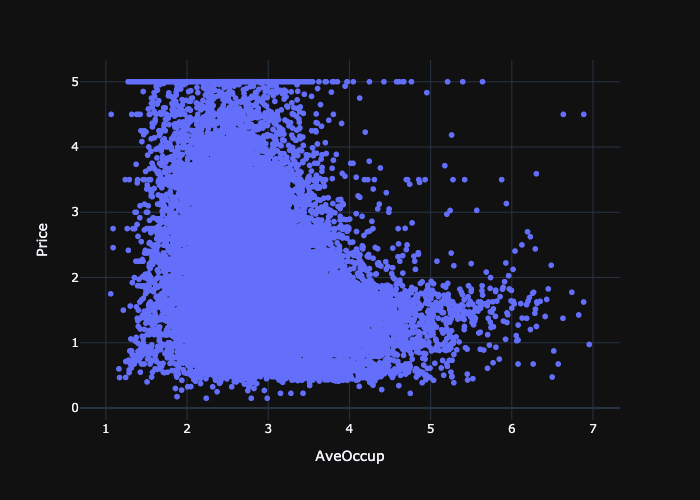

In [21]:
fig = px.scatter(df, x="AveOccup", y="Price", template="plotly_dark" )
#fig.show()
fig.show('png')

## Save the cleaned data

In [22]:
data_dir = 'data'
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

In [23]:
df.to_csv(data_dir+'/calhousing_clean.csv', index = False)